In [2]:
import sys
!{sys.executable} -m pip install numpy


You are using pip version 19.0.3, however version 19.3.1 is available.
You should consider upgrading via the 'pip install --upgrade pip' command.


In [3]:
!{sys.executable} -m pip install matplotlib

You are using pip version 19.0.3, however version 19.3.1 is available.
You should consider upgrading via the 'pip install --upgrade pip' command.


In [4]:
!{sys.executable} -m pip install pandas

You are using pip version 19.0.3, however version 19.3.1 is available.
You should consider upgrading via the 'pip install --upgrade pip' command.


In [5]:
!{sys.executable} -m pip install scikit-learn

You are using pip version 19.0.3, however version 19.3.1 is available.
You should consider upgrading via the 'pip install --upgrade pip' command.


In [6]:
!{sys.executable} -m pip install statsmodels

You are using pip version 19.0.3, however version 19.3.1 is available.
You should consider upgrading via the 'pip install --upgrade pip' command.


In [43]:
!{sys.executable} -m pip install seaborn

You are using pip version 19.0.3, however version 19.3.1 is available.
You should consider upgrading via the 'pip install --upgrade pip' command.


In [76]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as seabornInstance
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn import metrics
%matplotlib inline

In [77]:
df = pd.read_csv('tmdb_data_copy.csv')

In [78]:
keywords = pd.read_csv('keywords_copy.csv')
keywords.head()
#this is copied from rahul. idk what this means

,keywords
0,"['saving the world', 'riddle', 'whip', 'treasu..."
1,"['new york', 'rio de janeiro', 'superhero', 'b..."
2,"['tempel', 'shaolin', 'teenager', 'urination',..."
3,"['dc comics', 'crime fighter', 'secret identit..."
4,"['saving the world', 'artificial intelligence'..."


In [79]:
df = pd.concat([df, keywords], axis = 1, sort = False)
#copied from rahul

In [80]:
df.head()
#copied from rahul

,title,year,release_date,cast,crew,rating,overview,budget,total_revenue,tmdb_id,...,History,Horror,Music,Mystery,Romance,Science Fiction,Thriller,War,Western,keywords
0,Harry Potter and the Half-Blood Prince,2009,"July 8, 2009","['Daniel Radcliffe', 'Rupert Grint', 'Emma Wat...","{'Director': ['David Yates'], 'Novel': ['J.K. ...",PG,"As Harry begins his sixth year at Hogwarts, he...",250000000,933959197,767,...,0,0,0,0,0,0,0,0,0,"['saving the world', 'riddle', 'whip', 'treasu..."
1,Terminator Salvation,2009,"May 20, 2009","['Christian Bale', 'Sam Worthington', 'Anton Y...","{'Director': ['McG'], 'Writer': ['Michael Ferr...",PG-13,"All grown up in post-apocalyptic 2018, John Co...",200000000,371353001,534,...,0,0,0,0,0,1,1,0,0,"['new york', 'rio de janeiro', 'superhero', 'b..."
2,Indiana Jones and the Kingdom of the Crystal S...,2008,"May 22, 2008","['Harrison Ford', 'Cate Blanchett', 'Shia LaBe...","{'Characters': ['George Lucas', 'Philip Kaufma...",PG-13,"Set during the Cold War, the Soviets – led by ...",185000000,786636033,217,...,0,0,0,0,0,0,0,0,0,"['tempel', 'shaolin', 'teenager', 'urination',..."
3,The Incredible Hulk,2008,"June 12, 2008","['Edward Norton', 'Liv Tyler', 'Tim Roth', 'Wi...","{'Characters': ['Stan Lee', 'Jack Kirby'], 'Di...",PG-13,Scientist Bruce Banner scours the planet for a...,150000000,163712074,1724,...,0,0,0,0,0,1,0,0,0,"['dc comics', 'crime fighter', 'secret identit..."
4,The Dark Knight,2008,"July 14, 2008","['Christian Bale', 'Michael Caine', 'Heath Led...","{'Director': ['Christopher Nolan'], 'Screenpla...",PG-13,Batman raises the stakes in his war on crime. ...,185000000,1004558444,155,...,0,0,0,0,0,0,1,0,0,"['saving the world', 'artificial intelligence'..."


In [81]:
#THIS IS A LINE THAT I MADE

from sklearn.linear_model import LinearRegression
mlr = LinearRegression()
mlr.fit(df[['year','budget','total_theaters','runtime','in_collection']], df['total_revenue'])
print("intercept:", mlr.intercept_)
print("coefficients:", mlr.coef_)

intercept: -3191170222.931529
coefficients: [1.37835706e+06 2.34299656e+00 6.80490222e+04 2.11852391e+06
 1.31759658e+08]


In [82]:
# THIS IS ME MESSING AROUND
df.describe()

,year,budget,total_revenue,tmdb_id,total_theaters,opening_theaters,runtime,in_collection,Action,Adventure,...,Fantasy,History,Horror,Music,Mystery,Romance,Science Fiction,Thriller,War,Western
count,900.000000,9.000000e+02,9.000000e+02,900.000000,900.000000,900.000000,900.000000,900.000000,900.000000,900.000000,...,900.000000,900.000000,900.000000,900.000000,900.000000,900.000000,900.000000,900.000000,900.000000,900.000000
mean,2013.218889,7.016068e+07,2.486699e+08,171269.428889,3187.472222,2960.057778,111.622222,0.357778,0.335556,0.286667,...,0.142222,0.036667,0.098889,0.024444,0.078889,0.135556,0.171111,0.244444,0.026667,0.013333
std,3.308713,6.349508e+07,2.982609e+08,152521.180566,677.319196,1072.256133,18.668395,0.479613,0.472447,0.452456,...,0.349472,0.188047,0.298679,0.154510,0.269715,0.342506,0.376815,0.429996,0.161197,0.114761
min,2008.000000,2.500000e+01,3.200000e+01,155.000000,775.000000,1.000000,13.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,2010.000000,2.500000e+07,7.413754e+07,38357.750000,2821.000000,2719.750000,98.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,2013.000000,4.800000e+07,1.403448e+08,109427.500000,3188.000000,3132.000000,109.500000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,2016.000000,1.000000e+08,2.996498e+08,298265.500000,3657.000000,3615.000000,123.000000,1.000000,1.000000,1.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,2019.000000,5.000000e+08,2.797801e+09,535544.000000,4662.000000,4662.000000,188.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


<function matplotlib.pyplot.show(*args, **kw)>

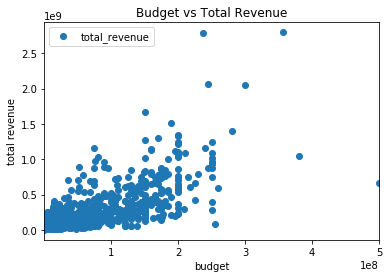

In [83]:
# THIS IS ME MESSING AROUND
df.plot(x = 'budget', y = 'total_revenue', style = 'o')
plt.title("Budget vs Total Revenue")
plt.xlabel('budget')
plt.ylabel('total revenue')
plt.show


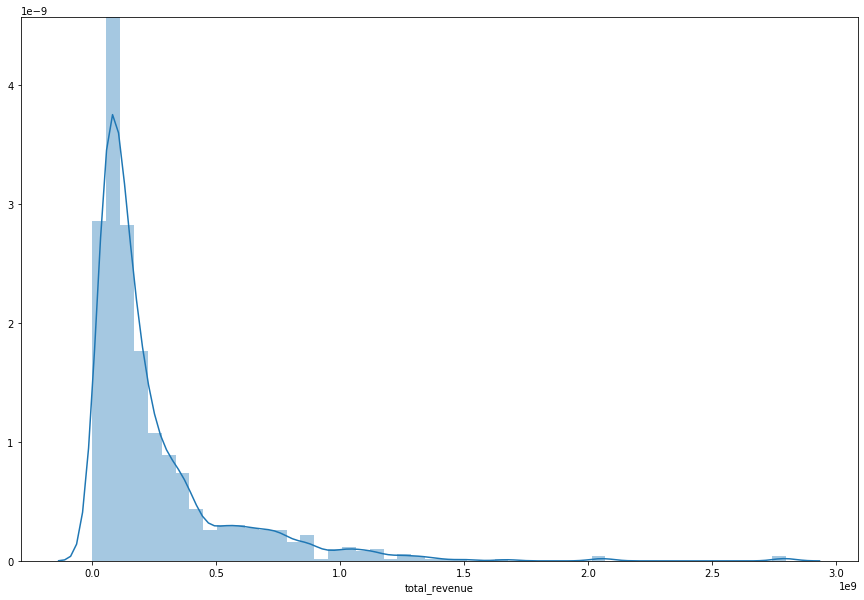

In [84]:
# THIS IS ME MESSING AROUND
plt.figure(figsize=(15,10))
plt.tight_layout()
seabornInstance.distplot(df['total_revenue'])

In [85]:
df.isnull().any()

title                   False
year                    False
release_date            False
cast                    False
crew                    False
rating                  False
overview                False
budget                  False
total_revenue           False
tmdb_id                 False
studio                  False
total_gross             False
total_theaters          False
opening_gross           False
opening_theaters        False
opening_date            False
production_companies    False
runtime                 False
in_collection           False
imdb_id                 False
Action                  False
Adventure               False
Animation               False
Comedy                  False
Crime                   False
Documentary             False
Drama                   False
Family                  False
Fantasy                 False
History                 False
Horror                  False
Music                   False
Mystery                 False
Romance   

In [86]:
#divide data into attributes/features (x-variable) and labels (y variable)
X = df[['year','budget','total_theaters','runtime','in_collection']].values

y = df['total_revenue'].values

In [87]:
#split 80% training; 20% test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)


In [88]:
regressor = LinearRegression()
regressor.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [102]:
#coefficients
coeff_df = pd.DataFrame(regressor.coef_, columns = ['Coefficient'])
coeff_df
#0 = year
#1 = budget
#2 = total_theaters
#3 = runtime
#4 = in_collection

,Coefficient
0,2.639132e+06
1,2.308929e+00
2,7.072466e+04
3,1.974579e+06
4,1.223630e+08


In [103]:
#prediction on test data
y_pred = regressor.predict(X_test)

In [107]:
#check differences between actual value and predicted value
df = pd.DataFrame({"Actual": y_test, "Predicted": y_pred})
df1 = df.head(40)
print(df1)

        Actual     Predicted
0     94841481  3.163041e+07
1    183293131  1.741809e+08
2    240159255  2.666072e+08
3    170764026  4.952095e+07
4    153997819  1.768886e+08
5     38307627  1.146402e+08
6     60848932  3.770731e+07
7     46069568  6.745066e+07
8    433677183  4.570198e+08
9     52395996  6.769131e+07
10    41325328 -1.381507e+07
11  1066969703  6.604044e+08
12   144492830  1.445167e+08
13   101332962  3.731071e+07
14   173965010  1.243438e+08
15   150483765  9.361606e+07
16   216197492  3.411342e+07
17    45300000  3.274574e+07
18    65146020  2.839866e+08
19   130560428  2.545078e+08
20   419665568  7.986528e+08
21   108758521  2.282874e+08
22    62882090  8.403896e+07
23    23600000 -2.202076e+06
24   255407969  4.450287e+07
25    41819064  1.106814e+08
26   136267476  6.315022e+07
27   109906372  1.183892e+08
28   306941670  3.793031e+08
29    98837872  1.899327e+08
30   319131050  2.865848e+08
31   473226958  3.504960e+08
32   104384188  2.331993e+08
33    98450062

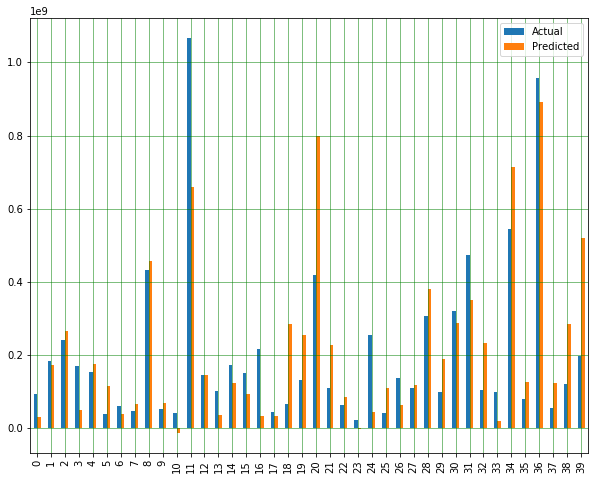

In [108]:
df1.plot(kind='bar',figsize=(10,8))
plt.grid(which='major', linestyle='-', linewidth='0.5', color='green')
plt.grid(which='minor', linestyle=':', linewidth='0.5', color='black')
plt.show()
#x axis = index number
#y axis = total revenue

In [109]:
#evaluate the performance of algorthim
print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, y_pred))  
print('Mean Squared Error:', metrics.mean_squared_error(y_test, y_pred))  
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))

Mean Absolute Error: 121963982.11282665
Mean Squared Error: 4.786332722925378e+16
Root Mean Squared Error: 218776889.1570903
